In [1]:
from thesis.config import *
from thesis.thesis_utils import load_p
from core.id_detection.feature_manager import FeatureManager
from utils.video_manager import get_auto_video_manager
offset = 50

In [2]:
p = load_p(camera3_path, semistate='id_classified')
fm = FeatureManager(p.working_directory, db_name='fm_idtracker_i')
vm = get_auto_video_manager(p)

examples1 = [p.chm[389][0], p.chm[390][0], p.chm[391][1], p.chm[388][0], p.chm[395][0]]
examples2 = [p.chm[389][-20], p.chm[390][-30], p.chm[391][-10], p.chm[388][-10], p.chm[395][-1]]

examples2 = list(reversed(examples2))
print examples1, examples2

dataset = 'camera3'
offset = 50

Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/rm.sqlite3 


Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/temp/part0_rm.sqlite3 
Initializing db at /Users/flipajs/Documents/wd/FERDA/Camera3/fm_idtracker_i 
[7, 8, 19, 6, 345] [1408, 2256, 5510, 6028, 304]


In [102]:
p = load_p(zebrafish_path, semistate='id_classified')
fm = FeatureManager(p.working_directory, db_name='fm_idtracker_i')
vm = get_auto_video_manager(p)

examples1 = [p.chm[1][1], p.chm[2][1], p.chm[3][1], p.chm[291][1], p.chm[292][1]]
examples2 = [p.chm[1][-20], p.chm[2][-30], p.chm[3][-10], p.chm[291][-10], p.chm[292][-1]]

examples2 = list(reversed(examples2))
print examples1, examples2

dataset = 'zebrafish'
offset = 60

Initializing db at /Users/flipajs/Documents/wd/FERDA/zebrafish_playground/rm.sqlite3 


Initializing db at /Users/flipajs/Documents/wd/FERDA/zebrafish_playground/temp/part0_rm.sqlite3 
Initializing db at /Users/flipajs/Documents/wd/FERDA/zebrafish_playground/fm_idtracker_i 
[5, 7, 8, 6, 9] [69, 22, 1183, 3066, 1132]


In [98]:
p = load_p(sowbug3_path, semistate='id_classified')
fm = FeatureManager(p.working_directory, db_name='fm_idtracker_i')
vm = get_auto_video_manager(p)

examples1 = [p.chm[118][50], p.chm[55][20], p.chm[1][1], p.chm[2][1], p.chm[85][1]]
examples2 = [p.chm[118][-100], p.chm[55][-30], p.chm[1][-10], p.chm[2][-50], p.chm[85][-1]]

examples2 = list(reversed(examples2))
print examples1, examples2

dataset = 'sowbug3'
offset = 30

Initializing db at /Users/flipajs/Documents/wd/FERDA/Sowbug3/rm.sqlite3 


Initializing db at /Users/flipajs/Documents/wd/FERDA/Sowbug3/temp/part0_rm.sqlite3 
Initializing db at /Users/flipajs/Documents/wd/FERDA/Sowbug3/fm_idtracker_i 
[3229, 114, 4, 5, 982] [1127, 7868, 4405, 1230, 8170]


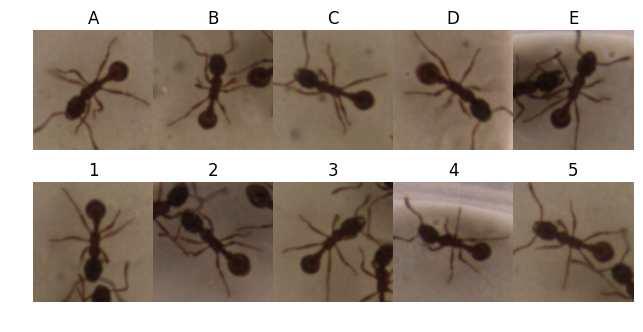

In [3]:
import matplotlib.pyplot as plt
from utils.drawing.points import draw_points_crop
from utils.img import get_safe_selection
import cv2
from core.id_detection.features import get_idtracker_features
import string
import matplotlib.gridspec as gridspec

plt.figure()

with_features = False
rows = 4 if with_features else 2
gs = gridspec.GridSpec(rows, len(examples1))

row_names = [list(string.ascii_uppercase), range(1, 30)]

i = 1
for row, ex in enumerate([examples1, examples2]):
    for i, e in enumerate(ex):
        r = p.gm.region(e)
        img = cv2.cvtColor(vm.get_frame(r.frame()), cv2.COLOR_BGR2RGB)
        
        pos = i + 1
        rows = 2
        if with_features:
            pos += 2*row*len(ex)
        else:
            pos += row*len(ex)
    
        y, x = r.centroid() - offset
        c = get_safe_selection(img, y, x, offset*2, offset*2)
        # plt.subplot(rows, len(ex), pos)
        plt.subplot(gs[i+row*len(ex)])
        plt.imshow(c)
        plt.axis('off')
        
        plt.title(row_names[row][i])
        
        if with_features:
            i_coo, c_coo = get_idtracker_features(r, p, config='Camera3', vectorize=False)
        
            plt.subplot(rows, len(ex), pos + len(ex))
            plt.imshow(i_coo)
            plt.axis('off')

# plt.subplots_adjust(top=0.2)
# plt.suptitle('Can you assign correct identity?')
# plt.tight_layout(pad=0.0, h_pad=0.2, w_pad=1.1)

# gs.update(wspace=0)
# gs.update(hspace=0.1)
plt.tight_layout()
plt.subplots_adjust(hspace=-.3, wspace=0.0, left=0.0, right=1.0)
plt.savefig(OUT_IMGS_WD+'/guess_id_'+dataset+'.png', bbox_inches='tight', dpi=256)
plt.show()